In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from src.folder_handler import *
from src.cort_processor import *
from src.cca_processor import *
from src.tdt_support import *
from src.plotter import *
from src.decoders import *
from src.utils import *
import pickle
import scipy as sio
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
from src.wiener_filter import *
from matplotlib.pyplot import cm
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LinearRegression
import os
from itertools import cycle, islice
import copy

# patdump
with open('/home/diya/Documents/rat-fes/data/pickles/N5_171001_proc.pkl', 'rb') as inp: #YOUR PATH HERE
    cp1=pickle.load(inp)
    
with open('/home/diya/Documents/rat-fes/data/pickles/N5_171016_proc.pkl', 'rb') as inp: #YOUR PATH HERE
    cp2=pickle.load(inp)
    
with open('/home/diya/Documents/rat-fes/data/pickles/N5_171130_proc.pkl', 'rb') as inp: #YOUR PATH HERE
    cp3=pickle.load(inp)
    
----

with open('/home/diya/Documents/rat-fes/data/pickles/N6_171026_proc.pkl', 'rb') as inp: #YOUR PATH HERE
    cp1=pickle.load(inp)
    
with open('/home/diya/Documents/rat-fes/data/pickles/N6_171204_proc.pkl', 'rb') as inp: #YOUR PATH HERE
    cp2=pickle.load(inp)
    
with open('/home/diya/Documents/rat-fes/data/pickles/N6_171211_proc.pkl', 'rb') as inp: #YOUR PATH HERE
    cp3=pickle.load(inp)
    
----

with open('/home/diya/Documents/rat-fes/data/pickles/N5_mixed.pkl', 'rb') as inp: #YOUR PATH HERE
    cp1 = pickle.load(inp)
with open('/home/diya/Documents/rat-fes/data/pickles/N6_mixed.pkl', 'rb') as inp: #YOUR PATH HERE
    cp2 = pickle.load(inp)
with open('/home/diya/Documents/rat-fes/data/pickles/N9_mixed.pkl', 'rb') as inp: #YOUR PATH HERE
    cp3 = pickle.load(inp)
    
----

with open('/home/diya/Documents/rat-fes/data/pickles/N9_171121_proc.pkl', 'rb') as inp: #YOUR PATH HERE
    cp1=pickle.load(inp)
    
with open('/home/diya/Documents/rat-fes/data/pickles/N9_171204_proc.pkl', 'rb') as inp: #YOUR PATH HERE
    cp2=pickle.load(inp)
    
with open('/home/diya/Documents/rat-fes/data/pickles/N9_171211_proc.pkl', 'rb') as inp: #YOUR PATH HERE
    cp3=pickle.load(inp)


In [30]:
with open('/home/diya/Documents/rat-fes/data/pickles/N6_171026_proc.pkl', 'rb') as inp: #YOUR PATH HERE
    cp1=pickle.load(inp)
    
with open('/home/diya/Documents/rat-fes/data/pickles/N6_171204_proc.pkl', 'rb') as inp: #YOUR PATH HERE
    cp2=pickle.load(inp)
    
with open('/home/diya/Documents/rat-fes/data/pickles/N6_171211_proc.pkl', 'rb') as inp: #YOUR PATH HERE
    cp3=pickle.load(inp)

In [31]:
cp_list = [cp1, cp2, cp3]

In [32]:
day0_decoder, vaffy, nada, nadax = cp1.decode_angles(X = cp1.apply_PCA(dims=8), metric=1)
day0_transformer = cp1.pca_object
print(np.average(vaffy, 1)[1])

0.25899999999999995


In [33]:
fixed_vaf = []
same_vaf = []
for cp in cp_list:
    nada, temp_vaf, nadas, nadax = cp.decode_angles(X=cp.apply_PCA(dims=8), metric=1)
    same_vaf.append(np.average(temp_vaf, 1)[1])
    temp_x = cp.apply_PCA(dims=8, transformer=day0_transformer)[0]
    temp_y = cp.data['angles'][0]
    temp_x_format, temp_y_format = format_data(temp_x, temp_y)
    nada, temp_vaf, nadas, nadax = decode_kfolds(temp_x_format, temp_y_format, metric=1, preset_h = day0_decoder)
    fixed_vaf.append(np.average(temp_vaf, 1)[1])
    

In [34]:
same_vaf[0] = fixed_vaf[0]

# plot

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
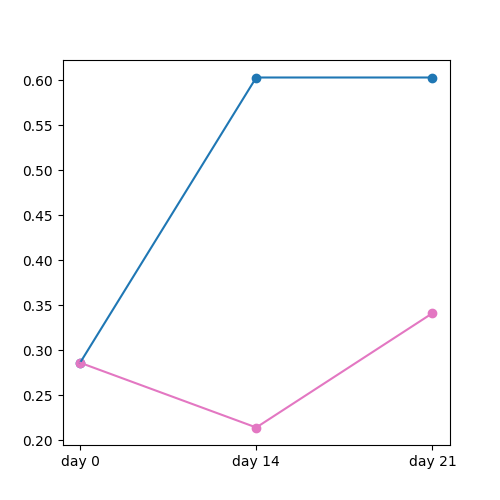

In [38]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

fig = plt.figure()
ax = fig.add_subplot(111)
ts = ['day 0', 'day 14', 'day 21']
ax.plot(ts, same_vaf[:], color='tab:blue')
ax.scatter(ts, same_vaf[:], color='tab:blue')
ax.plot(ts, fixed_vaf[:], color='tab:pink')
ax.scatter(ts, fixed_vaf[:], color='tab:pink')

ax.set(xlabel=None)

legend = ['retrained decoder', 'day0_decoder']
#ax.legend(legend)

#ax.axis('off')
fig.set_size_inches(5, 5)

fig.savefig('/home/diya/Documents/rat-fes/results/sfn_poster/fig3.pdf', dpi=600)